# Distributions

1) Probability mass functions

2) Cumulative distribution functions

3) Comparing distributions

4) Modeling distributions

Note: The below-mentioned link have all the practical examples of everything.
https://pypi.org/project/empiricaldist/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

gss = pd.read_hdf('./Data/gss.hdf5', 'gss')

gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


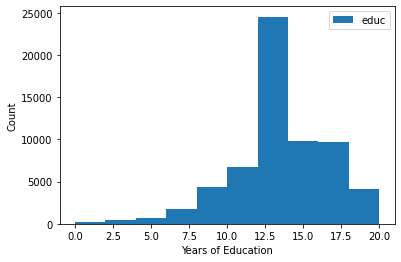

pandas.core.series.Series

In [3]:
educ = gss['educ']
plt.hist(educ.dropna(), label='educ')

plt.xlabel('Years of Education')
plt.ylabel('Count')
plt.legend()
plt.show()
type(educ)

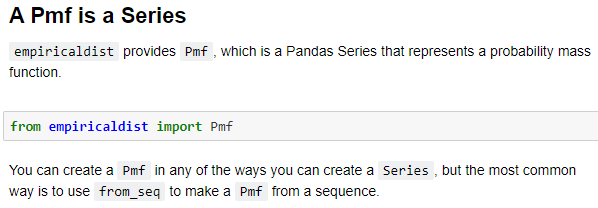

In [4]:
from empiricaldist import Pmf

pmf_educ = Pmf.from_seq(educ, normalize=False)
pmf_educ

,probs
0.0,144
1.0,38
2.0,151
3.0,246
4.0,290
5.0,379
6.0,842
7.0,860
8.0,2421
9.0,1963


## PMF

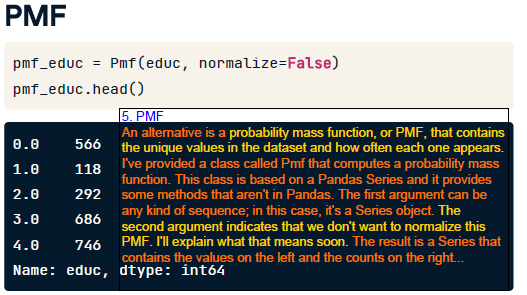

In [6]:
pmf_educ[12]

"""
This example shows that there are 19145 respondents with 12 years of 
education, which is the most frequent value.

"""

'\nThis example shows that there are 19145 respondents with 12 years of \neducation, which is the most frequent value.\n\n'

In [11]:
pmf_educ = Pmf.from_seq(educ)
pmf_educ.head(5)

# Note: By default, the probabilities are normalized to add up to 1.

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424
3.0,0.003948
4.0,0.004655


In [13]:
pmf_educ[12]

0.3072836414997432

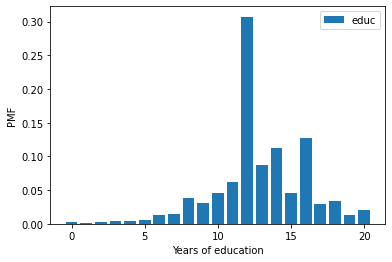

In [17]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.legend();

In [19]:
pmf_educ.qs

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [20]:
pmf_educ.ps

array([0.00231125, 0.00060991, 0.0024236 , 0.00394838, 0.0046546 ,
       0.00608308, 0.01351438, 0.01380329, 0.03885786, 0.03150681,
       0.04524589, 0.06201849, 0.30728364, 0.08675205, 0.11203133,
       0.04551875, 0.12764831, 0.02874615, 0.03385015, 0.01242296,
       0.02076913])

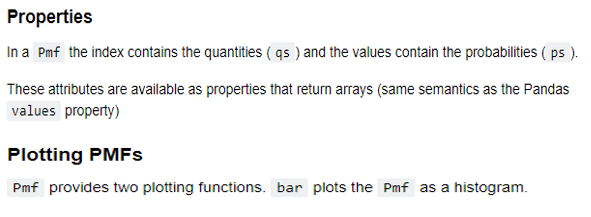

In [24]:
def pmf(title):
    """Labels the axes.
    
    title: string
    """
    plt.xlabel('Outcome')
    plt.ylabel('PMF')
    plt.title(title)

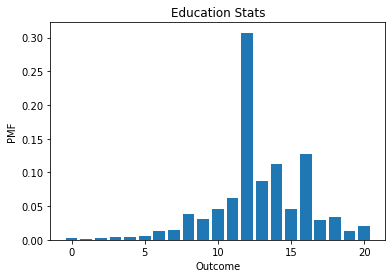

In [25]:
pmf_educ.bar()
pmf('Education Stats')

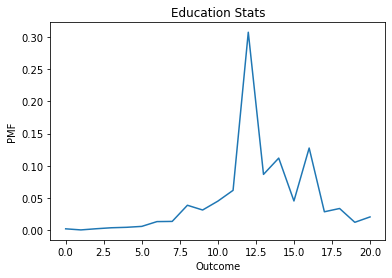

In [26]:
# plot displays the Pmf as a line.

pmf_educ.plot()
pmf('Education Stats')

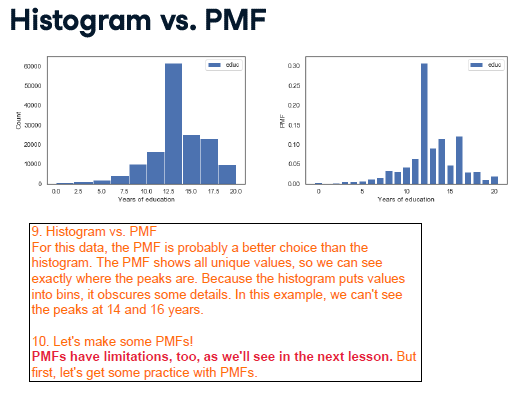

## Cumulative distribution functions

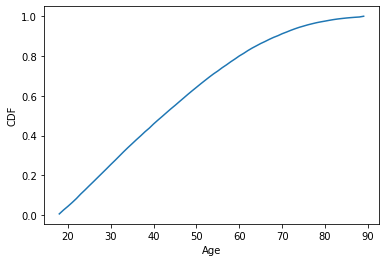

In [37]:
# Python tutorial: Cumulative Distribution Functions

from empiricaldist import Cdf

cdf_educ = Cdf.from_seq(educ)
cdf_educ.head(5)

cdf = Cdf.from_seq(gss['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [39]:
q = 51
p = cdf(q)
print(p)

0.6602013455146835


In [41]:
p = 0.25
q = cdf.inverse(p)
print(q)

30.0


In [42]:
p = 0.75
q = cdf.inverse(p)
print(q)

57.0


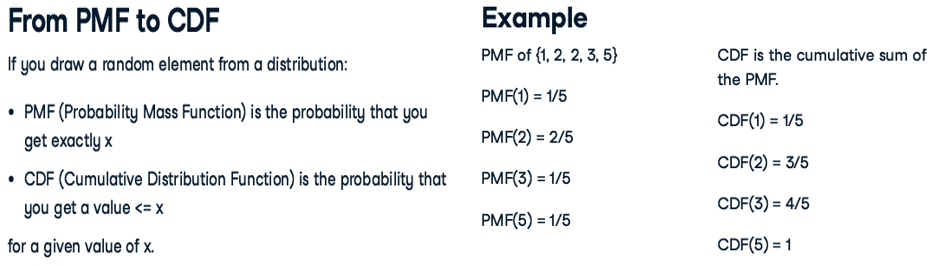

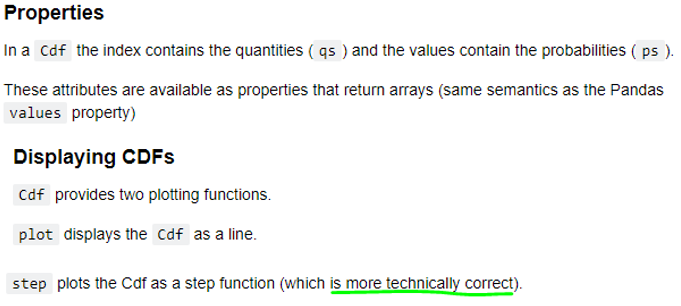

### Multiple PMFs

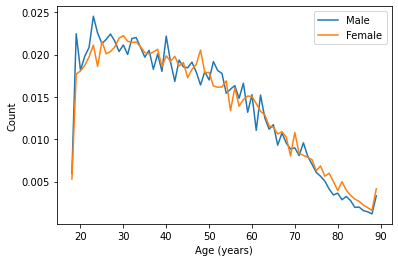

In [47]:
male = gss['sex'] == 1
age = gss['age']
male_age = age[male]
female_age = age[~male]
Pmf.from_seq(male_age).plot(label='Male')
Pmf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

### Multiple CDFs

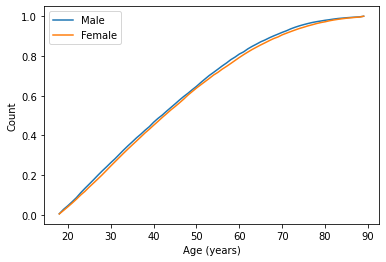

In [48]:
Cdf.from_seq(male_age).plot(label='Male')
Cdf.from_seq(female_age).plot(label='Female')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend()
plt.show()

### Income CDFs

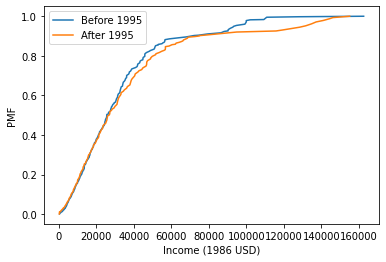

In [52]:
income = gss['realinc']
pre95 = gss['year'] < 1995

Cdf.from_seq(income[pre95]).plot(label='Before 1995')
Cdf.from_seq(income[~pre95]).plot(label='After 1995')
plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')
plt.legend()
plt.show()

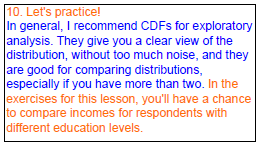

## Modeling Distributions

### The normal distribution

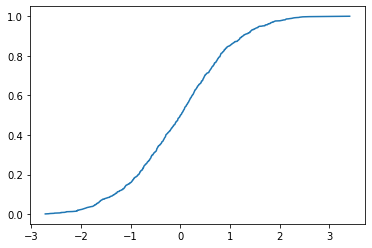

In [56]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

import numpy as np

sample = np.random.normal(size=1000)
Cdf.from_seq(sample).plot();

### The normal CDF

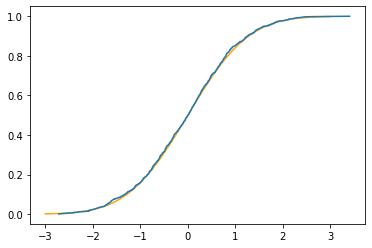

In [58]:
from scipy.stats import norm
xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)
plt.plot(xs, ys, color='orange');

Cdf.from_seq(sample).plot();

# Note: SciPy provides an object called norm that represents the 
# normal distribution. 

### The bell curve

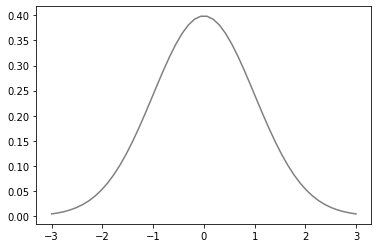

In [59]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray');

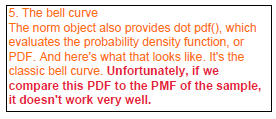

### KDE plot

In [ ]:
"""

we can use the points in the sample to estimate the PDF of the distribution 
they came from. This process is called kernel density estimation, or KDE. 


"""

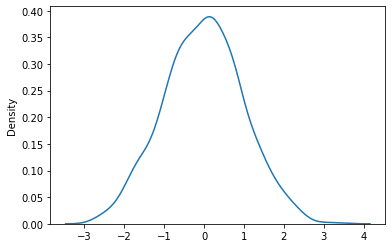

In [60]:
import seaborn as sns
sns.kdeplot(sample);

# Seaborn provides kdeplot, which takes the sample, estimates the PDF, and 
# plots it. 

### KDE and PDF

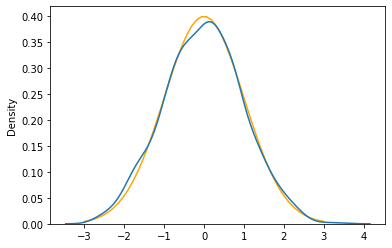

In [61]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='orange')
sns.kdeplot(sample);

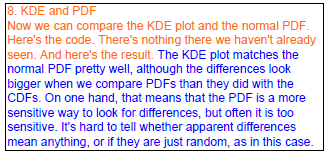

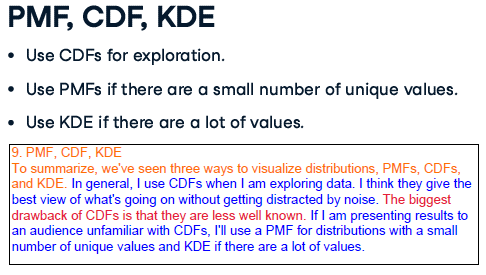